In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

from mapper_functions import plot_global

In [2]:
expt_name = 'DAv7_M36_ASCAT_type_13_comb_fp'

start_date = datetime(2015, 4, 1)
end_date = datetime(2018, 3, 31)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

In [3]:
# Specify the path to the netCDF file
file_path = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/{expt_name}.catch_progn_incr.20150402.nc4'

# Open the netCDF file
dataset = xr.open_dataset(file_path)

# Extract the lon and lat variables
lon = dataset['lon']
lat = dataset['lat']

# Print the dimensions of the variables
print(f"Dimensions of lon: {lon.shape}")
print(f"Dimensions of lat: {lat.shape}")

Dimensions of lon: (112573,)
Dimensions of lat: (112573,)


In [4]:
# Open each of the saved files

data_2015 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2015.npz', allow_pickle=True)
data_2016 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2016.npz', allow_pickle=True)
data_2017 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2017.npz', allow_pickle=True)
# data_2018 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2018.npz', allow_pickle=True)
# data_2019 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2019.npz', allow_pickle=True)
# data_2020 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2020.npz', allow_pickle=True)

In [5]:
# Extract and combine the data from each of the files
date_time = np.concatenate((data_2015['date_time'], data_2016['date_time'], data_2017['date_time'])) #, data_2018['date_time'], data_2019['date_time'], data_2020['date_time']))
obs_species = np.concatenate((data_2015['obs_species'], data_2016['obs_species'], data_2017['obs_species'])) #, data_2018['obs_species'], data_2019['obs_species'], data_2020['obs_species']))
obs_tilenum = np.concatenate((data_2015['obs_tilenum'], data_2016['obs_tilenum'], data_2017['obs_tilenum'])) #, data_2018['obs_tilenum'], data_2019['obs_tilenum'], data_2020['obs_tilenum']))
obs_lon = np.concatenate((data_2015['obs_lon'], data_2016['obs_lon'], data_2017['obs_lon'])) #, data_2018['obs_lon'], data_2019['obs_lon'], data_2020['obs_lon']))
obs_lat = np.concatenate((data_2015['obs_lat'], data_2016['obs_lat'], data_2017['obs_lat'])) #, data_2018['obs_lat'], data_2019['obs_lat'], data_2020['obs_lat']))
obs_obs = np.concatenate((data_2015['obs_obs'], data_2016['obs_obs'], data_2017['obs_obs'])) #, data_2018['obs_obs'], data_2019['obs_obs'], data_2020['obs_obs']))
obs_fcst = np.concatenate((data_2015['obs_fcst'], data_2016['obs_fcst'], data_2017['obs_fcst'])) #, data_2018['obs_fcst'], data_2019['obs_fcst'], data_2020['obs_fcst']))
obs_ana = np.concatenate((data_2015['obs_ana'], data_2016['obs_ana'], data_2017['obs_ana'])) #, data_2018['obs_ana'], data_2019['obs_ana'], data_2020['obs_ana']))

In [6]:
# Calculate obs minus fcst
obs_minus_fcst = []
for i in range(len(obs_obs)):
    obs_minus_fcst_chunk = obs_obs[i] - obs_fcst[i]
    obs_minus_fcst.append(obs_minus_fcst_chunk)
    

In [7]:
# Calculate obs minus ana
obs_minus_ana = []
for i in range(len(obs_obs)):
    obs_minus_ana_chunk = obs_obs[i] - obs_ana[i]
    obs_minus_ana.append(obs_minus_ana_chunk)
    

In [8]:
# Convert the lists to numpy arrays
obs_minus_fcst = np.array(obs_minus_fcst)
obs_minus_ana = np.array(obs_minus_ana)

In [9]:
# Find unique tilenum values
unique_tilenum = np.unique(obs_tilenum)

# Find the number of unique tilenum values
num_unique_tilenum = len(unique_tilenum)

# Print the number of unique tilenum values
print(f"Number of unique tilenum values: {num_unique_tilenum}")

Number of unique tilenum values: 95941


In [10]:
# Sort the arrays based on obs_tilenum
sort_indices = np.argsort(obs_tilenum)
sorted_obs_tilenum = obs_tilenum[sort_indices]
sorted_obs_species = obs_species[sort_indices]
sorted_obs_obs = obs_obs[sort_indices]
sorted_obs_fcst = obs_fcst[sort_indices]
sorted_obs_ana = obs_ana[sort_indices]
sorted_obs_minus_fcst = obs_minus_fcst[sort_indices]
sorted_obs_minus_ana = obs_minus_ana[sort_indices]

# Find the unique tilenum values and their counts
unique_tilenum, counts = np.unique(sorted_obs_tilenum, return_counts=True)

# Calculate the indices where the groups should be split
split_indices = np.cumsum(counts)[:-1]

# Split the sorted arrays based on the split indices
obs_species_grouped = np.split(sorted_obs_species, split_indices)
obs_obs_grouped = np.split(sorted_obs_obs, split_indices)
obs_fcst_grouped = np.split(sorted_obs_fcst, split_indices)
obs_ana_grouped = np.split(sorted_obs_ana, split_indices)
obs_minus_fcst_grouped = np.split(sorted_obs_minus_fcst, split_indices)
obs_minus_ana_grouped = np.split(sorted_obs_minus_ana, split_indices)

In [11]:
# Print the length of obs_obs_grouped
print(f"Length of obs_obs_grouped: {len(obs_obs_grouped)}")

Length of obs_obs_grouped: 95941


In [12]:
# Run this cell if you have a multi-sensor experiment

# Find the number of observations for each tilenum
num_obs_smap = []
num_obs_ascat = []
for i in range(num_unique_tilenum):
    num_obs_smap.append(len(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    num_obs_ascat.append(len(obs_obs_grouped[i][obs_species_grouped[i] > 4]))

#Calculate the mean of the observations for each tilenum
mean_obs_smap = []
mean_obs_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_smap.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_ascat.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the forecasts for each tilenum
mean_fcst_smap = []
mean_fcst_ascat = []
for i in range(num_unique_tilenum):
    mean_fcst_smap.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_fcst_ascat.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the analyses for each tilenum
mean_ana_smap = []
mean_ana_ascat = []
for i in range(num_unique_tilenum):
    mean_ana_smap.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_ana_ascat.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the obs minus fcst for each tilenum
mean_obs_minus_fcst_smap = []
mean_obs_minus_fcst_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_minus_fcst_smap.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_fcst_ascat.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the obs minus ana for each tilenum
mean_obs_minus_ana_smap = []
mean_obs_minus_ana_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_minus_ana_smap.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_ana_ascat.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the standard deviation of the obs_minus_fcst for each tilenum
std_obs_minus_fcst_smap = []
std_obs_minus_fcst_ascat = []
for i in range(num_unique_tilenum):
    std_obs_minus_fcst_smap.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_fcst_ascat.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the standard deviation of the obs_minus_ana for each tilenum
std_obs_minus_ana_smap = []
std_obs_minus_ana_ascat = []
for i in range(num_unique_tilenum):
    std_obs_minus_ana_smap.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_ana_ascat.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] > 4]))


/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
# Assign lon and lat to each tilenum
lon_tilenum = []
lat_tilenum = []
for i in range(num_unique_tilenum):
    lon_tilenum.append(lon[int(unique_tilenum[i])])
    lat_tilenum.append(lat[int(unique_tilenum[i])])

# Convert the lists to numpy arrays
lon_tilenum = np.array(lon_tilenum)
lat_tilenum = np.array(lat_tilenum)

In [16]:
# Run this cell if you have a multi-sensor experiment
# Save all the calculated values to a file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz',
         unique_tilenum=unique_tilenum,
         num_obs_smap=num_obs_smap,
         num_obs_ascat=num_obs_ascat,
         mean_obs_smap=mean_obs_smap,
         mean_obs_ascat=mean_obs_ascat,
         mean_fcst_smap=mean_fcst_smap,
         mean_fcst_ascat=mean_fcst_ascat,
         mean_ana_smap=mean_ana_smap,
         mean_ana_ascat=mean_ana_ascat,
         mean_obs_minus_fcst_smap=mean_obs_minus_fcst_smap,
         mean_obs_minus_fcst_ascat=mean_obs_minus_fcst_ascat,
         mean_obs_minus_ana_smap=mean_obs_minus_ana_smap,
         mean_obs_minus_ana_ascat=mean_obs_minus_ana_ascat,
         std_obs_minus_fcst_smap=std_obs_minus_fcst_smap,
         std_obs_minus_fcst_ascat=std_obs_minus_fcst_ascat,
         std_obs_minus_ana_smap=std_obs_minus_ana_smap,
         std_obs_minus_ana_ascat=std_obs_minus_ana_ascat,
         lon_tilenum=lon_tilenum,
         lat_tilenum=lat_tilenum)

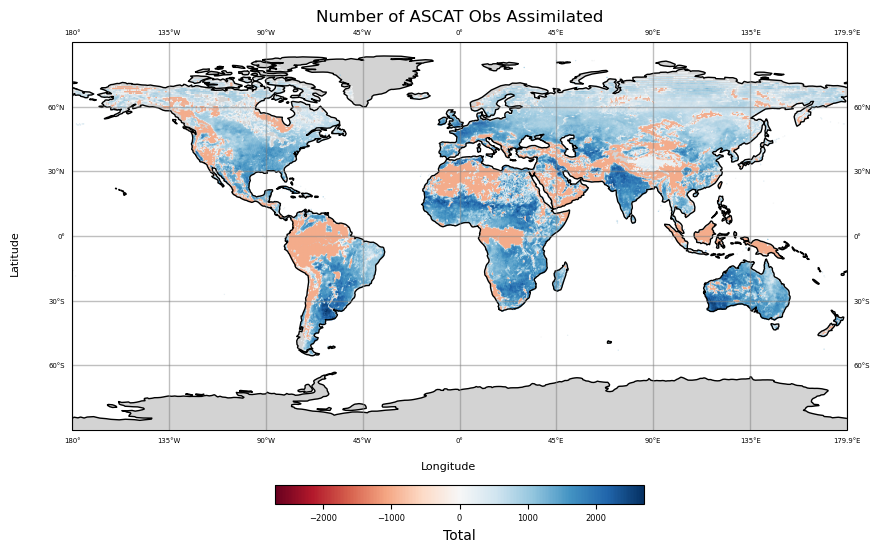

In [19]:

    test_array = num_obs_ascat
    test_array = np.array(test_array)
    test_array[test_array < 1] = -999
    
    obarray = np.empty([num_unique_tilenum, 3])
    obarray[:, 1] = lon_tilenum
    obarray[:, 2] = lat_tilenum
    obarray[:, 0] = test_array
    
    plot_global(obarray,False,'Number of ASCAT Obs Assimilated','Total')